# <center> Data cleaning y Modelo

In [1]:
#Librerias 
import pandas as pd
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')

In [2]:
'''
from google.colab import drive 
#Cargar files desde Drive con Colab
#--------------------------------------------------#

drive.mount('/content/gdrive')

#Dirección de  la carpeta donde se trabajara
driveFolder = "/content/gdrive/My Drive/Ciclo VIV/IA AVANZADA/Trabajo IA/Trabajo final codigos/futboll_players_data_new.csv"
'''

'\nfrom google.colab import drive \n#Cargar files desde Drive con Colab\n#--------------------------------------------------#\n\ndrive.mount(\'/content/gdrive\')\n\n#Dirección de  la carpeta donde se trabajara\ndriveFolder = "/content/gdrive/My Drive/Ciclo VIV/IA AVANZADA/Trabajo IA/Trabajo final codigos/futboll_players_data_new.csv"\n'

#### Cargar dataset

In [3]:
file1='futboll_players_data_new.csv'

In [4]:
df_football=pd.read_csv(file1,sep=',',encoding='UTF-16')
df_football.head(5)

,ID,name,pic,nombre_init,value,full_name,best_position,birth_country,Age,Fec_nac,...,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,1,Ederson,https://cdn.sofifa.org/players/10/19/210257.png,Ederson,$48.1M,Ederson Santana de Moraes,GK,Brazil,24.0,"Aug 17, 1993",...,Goalkeeper,"Aug 17, 1993",25,"Brazil, Portugal","1,88 m",left,"Jul 1, 2017",SL Benfica,30.06.2025,$79.80m
1,2,Arijanet Murić,https://cdn.sofifa.org/players/10/19/233164.png,A. Muric,$928K,Arijanet Muric,GK,Kosovo,19.0,"Nov 7, 1998",...,Goalkeeper,"Nov 7, 1998",20,"Kosovo, Montenegro","1,98 m",right,"Jul 1, 2018",Manchester City U23,30.06.2021,$2.28m
2,3,John Stones,https://cdn.sofifa.org/players/10/19/203574.png,J. Stones,$33.1M,John Stones,CB,England,24.0,"May 28, 1994",...,Centre-Back,"May 28, 1994",25,England,"1,88 m",right,"Aug 9, 2016",Everton FC,30.06.2022,$68.40m
3,4,Eliaquim Mangala,https://cdn.sofifa.org/players/10/19/190531.png,E. Mangala,$8.7M,Eliaquim Mangala,CB,France,27.0,"Feb 13, 1991",...,Centre-Back,"Feb 13, 1991",28,"France, Belgium","1,87 m",left,"Aug 11, 2014",FC Porto,30.06.2020,$11.40m
4,5,Philippe Sandler,https://cdn.sofifa.org/players/10/19/234679.png,P. Sandler,$3.5M,Philippe Sandler,CB,Netherlands,21.0,"Feb 10, 1997",...,Centre-Back,"Feb 10, 1997",22,Netherlands,"1,90 m",right,"Jul 31, 2018",PEC Zwolle,30.06.2022,$2.85m


#### Dimensiones dataset

In [5]:
df_football.shape

(2437, 72)

#### Tipo de datos

In [6]:
df_football.dtypes

ID                      int64
name                   object
pic                    object
nombre_init            object
value                  object
full_name              object
best_position          object
birth_country          object
Age                   float64
Fec_nac                object
altura                 object
peso                   object
rating                float64
potential             float64
wage                   object
preff_foot             object
club_name              object
club_pos               object
club_jersey           float64
release_clause         object
club_joined            object
contract_valid        float64
country                object
c_position             object
country_num_jersey    float64
speciality            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
                       ...   
heading_accuracy      float64
short_passing         float64
volleys   

#### Columnas en dataset

In [7]:
list(df_football)

['ID',
 'name',
 'pic',
 'nombre_init',
 'value',
 'full_name',
 'best_position',
 'birth_country',
 'Age',
 'Fec_nac',
 'altura',
 'peso',
 'rating',
 'potential',
 'wage',
 'preff_foot',
 'club_name',
 'club_pos',
 'club_jersey',
 'release_clause',
 'club_joined',
 'contract_valid',
 'country',
 'c_position',
 'country_num_jersey',
 'speciality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'traits',
 'current_team',
 'jersey_num',
 'position',
 'birthdate',
 'age',
 'nationality',
 'height',
 'foot',
 'joined',
 'signed_from',
 'contract_unt

## <center> Eliminación de variables

### Eliminar columnas similares

Dado que se unieron las tablas de Transfermarkt y SOFIFA se obtuvo en el dataset columnas similares (con valores identicos en algunos casos), las cuales se procederan a eliminar en esta parte.<br>
Se tienen las siguientes columnas : <p>
'ID','name','pic','nombre_init','value','full_name','best_position','birth_country','Age','Fec_nac','altura','peso','rating','potential','wage',<br>'preff_foot','club_name','club_pos','club_jersey','release_clause','club_joined','contract_valid','country','c_position','country_num_jersey','speciality','aggression',<br>'interceptions','positioning','vision','penalties','composure','marking','standing_tackle','sliding_tackle',<br>'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve',<br>'long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots',<br>'traits','current_team','jersey_num','position','birthdate','age','nationality','height','foot','joined','signed_from','contract_until','market_value'] <p>
 
ELIMINACIÓN:

Los campos eliminados son:
- age, Fec_nac, birthdate
- best_position, club_pos, c_position
- full_name, nombre_init
- altura
- country, nationality
- club_name, club_jersey
- value


In [8]:
df_football[['Age','age','Fec_nac','birthdate']] # queda age
df_football[['position','best_position','club_pos','c_position']] # queda position
df_football[['name','full_name','nombre_init']]#queda name
df_football[['preff_foot','foot']] #combinar ambos (más adelante se hara ello)
df_football[['altura','height']]#queda altura
df_football[['country','birth_country','nationality']] # queda birth_country |||| campo country son los que jugaron para la seleccion de su pais
df_football[['current_team','club_name','club_jersey','jersey_num']] # queda current team & jersey_num
df_football[['value','market_value']] # queda market_value
#df_football.iloc[2411]

#ELIMINAR COLUMNAS
dataset= df_football.drop(['Age','Fec_nac','birthdate','best_position','club_pos','c_position',
                          'full_name','nombre_init','height','country','nationality','club_name','club_jersey',
                          'value'], axis=1)
dataset.shape

(2437, 58)

In [9]:
#Pie preferido
#combinar ambos ['preff_foot','foot'] : en donde la columna foot no tenga valor completarlo con preff_foot.value
#-------------------------------------------------------------------------
dataset.insert(10,'pref_foot','a')

for i,foot in enumerate(dataset['preff_foot']):
    if dataset.loc[dataset.index[i], 'foot']=='-':
        if str(foot).lower()=='nan':
            dataset.loc[dataset.index[i], 'pref_foot']=np.nan
        else:
            #print('b')
            dataset.loc[dataset.index[i], 'pref_foot']=str(foot).lower()
    else:
        dataset.loc[dataset.index[i], 'pref_foot']=dataset.loc[dataset.index[i], 'foot']

#Eliminar columnas
dataset= dataset.drop(['preff_foot','foot'],axis=1)
dataset['pref_foot']

0        left
1       right
2       right
3        left
4       right
5        left
6       right
7       right
8        left
9        left
10      right
11       left
12      right
13      right
14       left
15      right
16      right
17       left
18      right
19      right
20       left
21      right
22       left
23       left
24       left
25      right
26      right
27      right
28      right
29      right
        ...  
2407     left
2408    right
2409    right
2410     left
2411    right
2412     left
2413    right
2414     left
2415    right
2416      NaN
2417    right
2418    right
2419    right
2420    right
2421    right
2422     left
2423    right
2424    right
2425     left
2426    right
2427     left
2428    right
2429    right
2430    right
2431    right
2432     left
2433    right
2434     both
2435    right
2436    right
Name: pref_foot, Length: 2437, dtype: object

In [10]:
dataset.tail(5)

,ID,name,pic,birth_country,altura,peso,rating,potential,wage,pref_foot,...,long_shots,traits,current_team,jersey_num,position,age,joined,signed_from,contract_until,market_value
2432,2415,Nathan Ralph,https://cdn.sofifa.org/players/10/19/202128.png,England,175cm,70kg,61.0,64.0,$2K,left,...,44.0,NaN,Dundee FC,3,Left-Back,26,"Jul 1, 2018",Woking FC,31.05.2020,$114k
2433,2416,Jesse Curran,https://cdn.sofifa.org/players/10/19/220853.png,Australia,172cm,68kg,59.0,70.0,$1K,right,...,37.0,NaN,Dundee FC,27,Defensive Midfield,22,"Jul 1, 2016",Dundee FC U20,31.05.2019,$285k
2434,2417,Martin Woods,https://cdn.sofifa.org/players/10/19/152745.png,Scotland,180cm,78kg,65.0,65.0,$3K,both,...,65.0,NaN,Dundee FC,4,Central Midfield,33,"Nov 2, 2018",Without Club,31.05.2019,$285k
2435,2418,Craig Curran,https://cdn.sofifa.org/players/10/19/179831.png,England,175cm,74kg,65.0,65.0,$3K,right,...,53.0,NaN,Dundee FC,23,Centre-Forward,29,"Jan 5, 2019",Dundee United FC,31.05.2021,$371k
2436,2419,Kenny Miller,https://cdn.sofifa.org/players/10/19/51353.png,Scotland,178cm,71kg,68.0,68.0,$3K,right,...,69.0,NaN,Dundee FC,20,Centre-Forward,39,"Aug 29, 2018",Livingston FC,31.05.2020,$228k


### Eliminar variables por cantidad de nulos

In [11]:
dataset.shape

(2437, 57)

In [12]:
#Cantidad de valores nulos
sum(dataset.isnull().sum())

15253

#### Evaluando por fila

In [13]:
#Contar valores por fila
pd.crosstab(dataset.apply(lambda x: x.count(), axis=1),'count')
#El cuadro quiere decir que hay seis filas que solo tienen nueve valores (por ejemplo)

col_0,count
row_0,
9,6
10,22
11,148
51,184
52,27
53,45
54,1694
55,311


In [14]:
#Añadir columna : evaluando si la fila se elimina
dataset['drop']=dataset.apply(lambda x: x.count()<50, axis=1)
dataset['drop']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2407    False
2408    False
2409    False
2410    False
2411    False
2412    False
2413    False
2414    False
2415    False
2416     True
2417    False
2418    False
2419    False
2420    False
2421    False
2422     True
2423    False
2424    False
2425    False
2426     True
2427     True
2428    False
2429    False
2430    False
2431     True
2432    False
2433    False
2434    False
2435    False
2436    False
Name: drop, Length: 2437, dtype: bool

In [15]:
#Fila con muchos valores nulos
dataset.iloc[2431]

ID                             2414
name                   Kerr Waddell
pic                             NaN
birth_country                   NaN
altura                          NaN
peso                            NaN
rating                          NaN
potential                       NaN
wage                            NaN
pref_foot                     right
release_clause                  NaN
club_joined                     NaN
contract_valid                  NaN
country_num_jersey              NaN
speciality                      NaN
aggression                      NaN
interceptions                   NaN
positioning                     NaN
vision                          NaN
penalties                       NaN
composure                       NaN
marking                         NaN
standing_tackle                 NaN
sliding_tackle                  NaN
gk_diving                       NaN
gk_handling                     NaN
gk_kicking                      NaN
gk_positioning              

In [16]:
#Fila con valores completos
dataset.iloc[0]

ID                                                                  1
name                                                          Ederson
pic                   https://cdn.sofifa.org/players/10/19/210257.png
birth_country                                                  Brazil
altura                                                          188cm
peso                                                             86kg
rating                                                             86
potential                                                          90
wage                                                            $145K
pref_foot                                                        left
release_clause                                                 $92.7M
club_joined                                               Jul 1, 2017
contract_valid                                                   2025
country_num_jersey                                                NaN
speciality          

In [17]:
#Contar valores de columna drop
dataset.groupby('drop').size()

drop
False    2261
True      176
dtype: int64

In [18]:
#Quitar filas con valores incompletos
dataset=dataset[dataset['drop']==False]
#resetear index
dataset.index = pd.RangeIndex(len(dataset.index))
dataset= dataset.drop(['drop'],axis=1)
dataset.head(5)

,ID,name,pic,birth_country,altura,peso,rating,potential,wage,pref_foot,...,long_shots,traits,current_team,jersey_num,position,age,joined,signed_from,contract_until,market_value
0,1,Ederson,https://cdn.sofifa.org/players/10/19/210257.png,Brazil,188cm,86kg,86.0,90.0,$145K,left,...,18.0,NaN,Manchester City,31,Goalkeeper,25,"Jul 1, 2017",SL Benfica,30.06.2025,$79.80m
1,2,Arijanet Murić,https://cdn.sofifa.org/players/10/19/233164.png,Kosovo,197cm,81kg,64.0,81.0,$5K,right,...,14.0,NaN,Manchester City,49,Goalkeeper,20,"Jul 1, 2018",Manchester City U23,30.06.2021,$2.28m
2,3,John Stones,https://cdn.sofifa.org/players/10/19/203574.png,England,188cm,70kg,83.0,87.0,$145K,right,...,38.0,NaN,Manchester City,5,Centre-Back,25,"Aug 9, 2016",Everton FC,30.06.2022,$68.40m
3,4,Eliaquim Mangala,https://cdn.sofifa.org/players/10/19/190531.png,France,187cm,84kg,76.0,78.0,$97K,left,...,48.0,NaN,Manchester City,15,Centre-Back,28,"Aug 11, 2014",FC Porto,30.06.2020,$11.40m
4,5,Philippe Sandler,https://cdn.sofifa.org/players/10/19/234679.png,Netherlands,190cm,82kg,70.0,83.0,$38K,right,...,52.0,NaN,Manchester City,34,Centre-Back,22,"Jul 31, 2018",PEC Zwolle,30.06.2022,$2.85m


In [19]:
dataset.shape

(2261, 57)

#### Evaluando por columna

In [20]:
#Cantidad de valores nulos
sum(dataset.isnull().sum())

7123

In [21]:
dataset.isnull().sum()

ID                       0
name                     0
pic                      0
birth_country            0
altura                   0
peso                     0
rating                   0
potential                0
wage                     0
pref_foot                0
release_clause         212
club_joined            211
contract_valid         211
country_num_jersey    1923
speciality            2261
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
composure                0
marking                  0
standing_tackle          0
sliding_tackle           0
gk_diving                0
gk_handling              0
gk_kicking               0
gk_positioning           0
gk_reflexes              0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
long_passing             0
b

In [22]:
#Variables con valores nulos mas altos
'''
release_clause         212
club_joined            211
contract_valid         211
country_num_jersey    1923
speciality            2261
traits                2261
'''
#Eliminar variables con altos missing
dataset= dataset.drop(['country_num_jersey','speciality','traits','release_clause','club_joined','contract_valid'],axis=1)
dataset.head()

,ID,name,pic,birth_country,altura,peso,rating,potential,wage,pref_foot,...,strength,long_shots,current_team,jersey_num,position,age,joined,signed_from,contract_until,market_value
0,1,Ederson,https://cdn.sofifa.org/players/10/19/210257.png,Brazil,188cm,86kg,86.0,90.0,$145K,left,...,68.0,18.0,Manchester City,31,Goalkeeper,25,"Jul 1, 2017",SL Benfica,30.06.2025,$79.80m
1,2,Arijanet Murić,https://cdn.sofifa.org/players/10/19/233164.png,Kosovo,197cm,81kg,64.0,81.0,$5K,right,...,68.0,14.0,Manchester City,49,Goalkeeper,20,"Jul 1, 2018",Manchester City U23,30.06.2021,$2.28m
2,3,John Stones,https://cdn.sofifa.org/players/10/19/203574.png,England,188cm,70kg,83.0,87.0,$145K,right,...,77.0,38.0,Manchester City,5,Centre-Back,25,"Aug 9, 2016",Everton FC,30.06.2022,$68.40m
3,4,Eliaquim Mangala,https://cdn.sofifa.org/players/10/19/190531.png,France,187cm,84kg,76.0,78.0,$97K,left,...,87.0,48.0,Manchester City,15,Centre-Back,28,"Aug 11, 2014",FC Porto,30.06.2020,$11.40m
4,5,Philippe Sandler,https://cdn.sofifa.org/players/10/19/234679.png,Netherlands,190cm,82kg,70.0,83.0,$38K,right,...,75.0,52.0,Manchester City,34,Centre-Back,22,"Jul 31, 2018",PEC Zwolle,30.06.2022,$2.85m


### Conversion de variables

In [23]:
dataset.dtypes

ID                    int64
name                 object
pic                  object
birth_country        object
altura               object
peso                 object
rating              float64
potential           float64
wage                 object
pref_foot            object
aggression          float64
interceptions       float64
positioning         float64
vision              float64
penalties           float64
composure           float64
marking             float64
standing_tackle     float64
sliding_tackle      float64
gk_diving           float64
gk_handling         float64
gk_kicking          float64
gk_positioning      float64
gk_reflexes         float64
crossing            float64
finishing           float64
heading_accuracy    float64
short_passing       float64
volleys             float64
dribbling           float64
curve               float64
long_passing        float64
ball_control        float64
acceleration        float64
sprint_speed        float64
agility             

In [24]:
#Transformar float to int
for x in dataset.columns:
    if dataset[x].dtype=='float64':
        dataset[x]=dataset[x].astype('int64')
        print(x)

rating
potential
aggression
interceptions
positioning
vision
penalties
composure
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots


In [25]:
#Observar datos correctamente transformados
#dataset['rating']=dataset['rating'].astype('int64')
dataset.dtypes

ID                   int64
name                object
pic                 object
birth_country       object
altura              object
peso                object
rating               int64
potential            int64
wage                object
pref_foot           object
aggression           int64
interceptions        int64
positioning          int64
vision               int64
penalties            int64
composure            int64
marking              int64
standing_tackle      int64
sliding_tackle       int64
gk_diving            int64
gk_handling          int64
gk_kicking           int64
gk_positioning       int64
gk_reflexes          int64
crossing             int64
finishing            int64
heading_accuracy     int64
short_passing        int64
volleys              int64
dribbling            int64
curve                int64
long_passing         int64
ball_control         int64
acceleration         int64
sprint_speed         int64
agility              int64
reactions            int64
b

## Graficos por jugador

In [26]:
#funcion
def defending(data):
    return int(round((data[['marking', 'standing_tackle', 
                               'sliding_tackle']].mean()).mean()))

def general(data):
    return int(round((data[['heading_accuracy', 'dribbling', 'curve', 
                               'ball_control']].mean()).mean()))

def mental(data):
    return int(round((data[['aggression', 'interceptions', 'positioning', 
                               'vision','composure']].mean()).mean()))

def passing(data):
    return int(round((data[['crossing', 'short_passing', 
                               'long_passing']].mean()).mean()))

def mobility(data):
    return int(round((data[['acceleration', 'sprint_speed', 
                               'agility','reactions']].mean()).mean()))
def power(data):
    return int(round((data[['balance', 'jumping', 'stamina', 
                               'strength']].mean()).mean()))

def rating(data):
    return int(round((data[['potential', 'rating']].mean()).mean()))

def shooting(data):
    return int(round((data[['finishing', 'volleys',                               #'FKAccuracy',
                               'shot_power','long_shots', 'penalties']].mean()).mean()))

In [27]:
# renaming a column
dataset.rename(columns={'pic':'player_image'}, inplace=True)

# adding these categories to the data
dataset['Defending'] = dataset.apply(defending, axis = 1)
dataset['General'] = dataset.apply(general, axis = 1)
dataset['Mental'] = dataset.apply(mental, axis = 1)
dataset['Passing'] = dataset.apply(passing, axis = 1)
dataset['Mobility'] = dataset.apply(mobility, axis = 1)
dataset['Power'] = dataset.apply(power, axis = 1)
dataset['Rating'] = dataset.apply(rating, axis = 1)
dataset['Shooting'] = dataset.apply(shooting, axis = 1)

In [28]:
dataset.columns

Index(['ID', 'name', 'player_image', 'birth_country', 'altura', 'peso',
       'rating', 'potential', 'wage', 'pref_foot', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'current_team',
       'jersey_num', 'position', 'age', 'joined', 'signed_from',
       'contract_until', 'market_value', 'Defending', 'General', 'Mental',
       'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')

In [29]:
#Graphics of players
players = dataset[['name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','position','age',
                'birth_country', 'player_image', 'market_value', 'current_team']]

players.head()

,name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,position,age,birth_country,player_image,market_value,current_team
0,Ederson,17,23,57,45,68,56,88,22,Goalkeeper,25,Brazil,https://cdn.sofifa.org/players/10/19/210257.png,$79.80m,Manchester City
1,Arijanet Murić,12,18,39,29,45,50,72,16,Goalkeeper,20,Kosovo,https://cdn.sofifa.org/players/10/19/233164.png,$2.28m,Manchester City
2,John Stones,84,70,64,72,70,72,85,37,Centre-Back,25,England,https://cdn.sofifa.org/players/10/19/203574.png,$68.40m,Manchester City
3,Eliaquim Mangala,77,55,55,56,62,74,77,47,Centre-Back,28,France,https://cdn.sofifa.org/players/10/19/190531.png,$11.40m,Manchester City
4,Philippe Sandler,70,68,55,58,64,66,76,42,Centre-Back,22,Netherlands,https://cdn.sofifa.org/players/10/19/234679.png,$2.85m,Manchester City


In [30]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg" 
        
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    #img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    #ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    #ax_image.imshow(img,alpha=0.5)
    #ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (4, 5),
                        xybox=(250, 240),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    '''
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    '''
    ax.add_artist(abPlayer)
    #ax.add_artist(abLogo)

    plt.title(title, size=20, color= basic_color)

In [31]:
def graphPolar(id = 0):
    if 0 <= id < len(dataset.ID):
        details(row = players.index[id], 
                title = players['name'][id], 
                age = players['age'][id], 
                photo = players['player_image'][id],
                nationality = players['birth_country'][id],
                image = players['position'][id], 
                logo = players['market_value'][id], 
                club = players['current_team'][id])
    else:
        print('Numero excede a la base de jugadores')

In [32]:
players[players['name']=='Lionel Messi']

,name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,position,age,birth_country,player_image,market_value,current_team
1043,Lionel Messi,29,89,55,89,91,75,94,87,Right Winger,31,Argentina,https://cdn.sofifa.org/players/10/19/158023.png,$171.00m,FC Barcelona


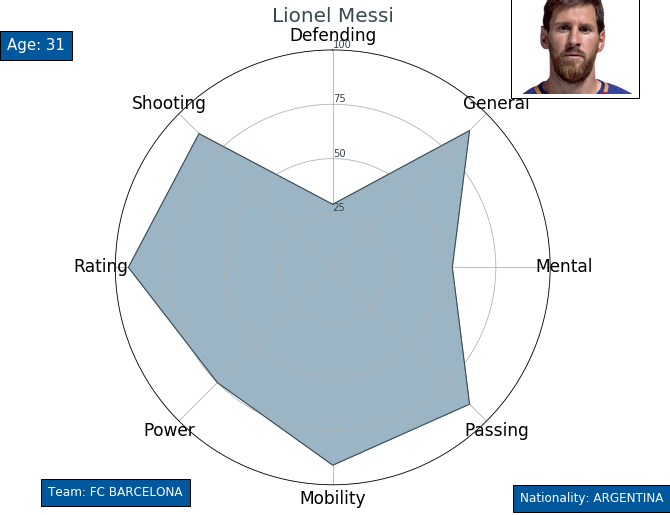

In [33]:
graphPolar(1043)

## Transformaciones de variables

### Columna market_value -> valor real

In [34]:
def real_mkt_value(df):
    #Convertir a númerico los valores del mercado
    for i,data in enumerate(df['market_value']):
        if len(data.split('m'))>1:
            #convertir $7.98m -> 7 980 000
            mill=float(data.replace('m','').replace('$',''))*1000000
            #Colocar nuevo valor en su posicion respectiva
            df.at[i,'market_value'] = mill
        elif len(data.split('k'))>1:
            k=float(data.replace('k','').replace('$',''))*1000
            df.at[i,'market_value'] = k
        else:
            k=0
            df.at[i,'market_value'] = k
            
    df['market_value']=df['market_value'].astype('float')

### Columna wage (salario) -> valor real

In [35]:
def real_wage(df):
    #Convertir a númerico los valores del mercado
    for i,data in enumerate(df['wage']):
        try:
            if len(data.split('K'))>1:
                #convertir $145K -> 145 000
                K=float(data.replace('K','').replace('$',''))*1000
                #Colocar nuevo valor en su posicion respectiva
                df.at[i,'wage'] = K
        except:
            df.at[i,'wage'] = np.nan

    df['wage']=df['wage'].astype('int64')

### Columna peso -> valor real

In [36]:
def real_peso(df):
    #Convertir a númerico los valores del mercado
    for i,data in enumerate(df['peso']):
        try:
            if len(data.split('kg'))>1:
                #convertir 80kg -> 80
                kg=int(data.replace('kg',''))
                #Colocar nuevo valor en su posicion respectiva
                df.at[i,'peso'] = kg
        except:
            df.at[i,'peso'] = np.nan
    df['peso']=df['peso'].astype('int64')

### Columna altura -> valor real

In [37]:
def real_altura(df):
    #Convertir a númerico los valores del mercado
    for i,data in enumerate(df['altura']):
        try:
            if len(data.split('cm'))>1:
                #convertir 80kg -> 80
                h=int(data.replace('cm',''))
                #Colocar nuevo valor en su posicion respectiva
                df.at[i,'altura'] = h
        except:
            df.at[i,'h'] = np.nan

    df['altura']=df['altura'].astype('int64')

In [38]:
real_mkt_value(dataset)
real_wage(dataset)
real_peso(dataset)
real_altura(dataset)
dataset.head(5)

,ID,name,player_image,birth_country,altura,peso,rating,potential,wage,pref_foot,...,contract_until,market_value,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,1,Ederson,https://cdn.sofifa.org/players/10/19/210257.png,Brazil,188,86,86,90,145000,left,...,30.06.2025,79800000.0,17,23,57,45,68,56,88,22
1,2,Arijanet Murić,https://cdn.sofifa.org/players/10/19/233164.png,Kosovo,197,81,64,81,5000,right,...,30.06.2021,2280000.0,12,18,39,29,45,50,72,16
2,3,John Stones,https://cdn.sofifa.org/players/10/19/203574.png,England,188,70,83,87,145000,right,...,30.06.2022,68400000.0,84,70,64,72,70,72,85,37
3,4,Eliaquim Mangala,https://cdn.sofifa.org/players/10/19/190531.png,France,187,84,76,78,97000,left,...,30.06.2020,11400000.0,77,55,55,56,62,74,77,47
4,5,Philippe Sandler,https://cdn.sofifa.org/players/10/19/234679.png,Netherlands,190,82,70,83,38000,right,...,30.06.2022,2850000.0,70,68,55,58,64,66,76,42


In [40]:
dataset.dtypes

ID                    int64
name                 object
player_image         object
birth_country        object
altura                int64
peso                  int64
rating                int64
potential             int64
wage                  int64
pref_foot            object
aggression            int64
interceptions         int64
positioning           int64
vision                int64
penalties             int64
composure             int64
marking               int64
standing_tackle       int64
sliding_tackle        int64
gk_diving             int64
gk_handling           int64
gk_kicking            int64
gk_positioning        int64
gk_reflexes           int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys               int64
dribbling             int64
curve                 int64
long_passing          int64
ball_control          int64
acceleration          int64
sprint_speed          int64
agility             

### <center> VISUALIZACIÓN DE DATA

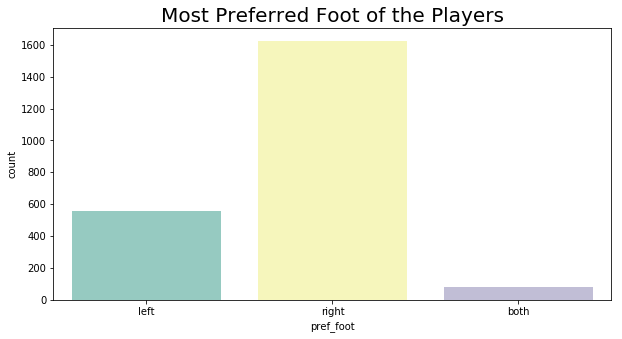

In [41]:
# comparison of preferred foot over the different players
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(dataset['pref_foot'], palette = 'Set3')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

In [42]:
pd.crosstab(dataset['pref_foot'],"# player's")

col_0,# player's
pref_foot,
both,82
left,556
right,1623


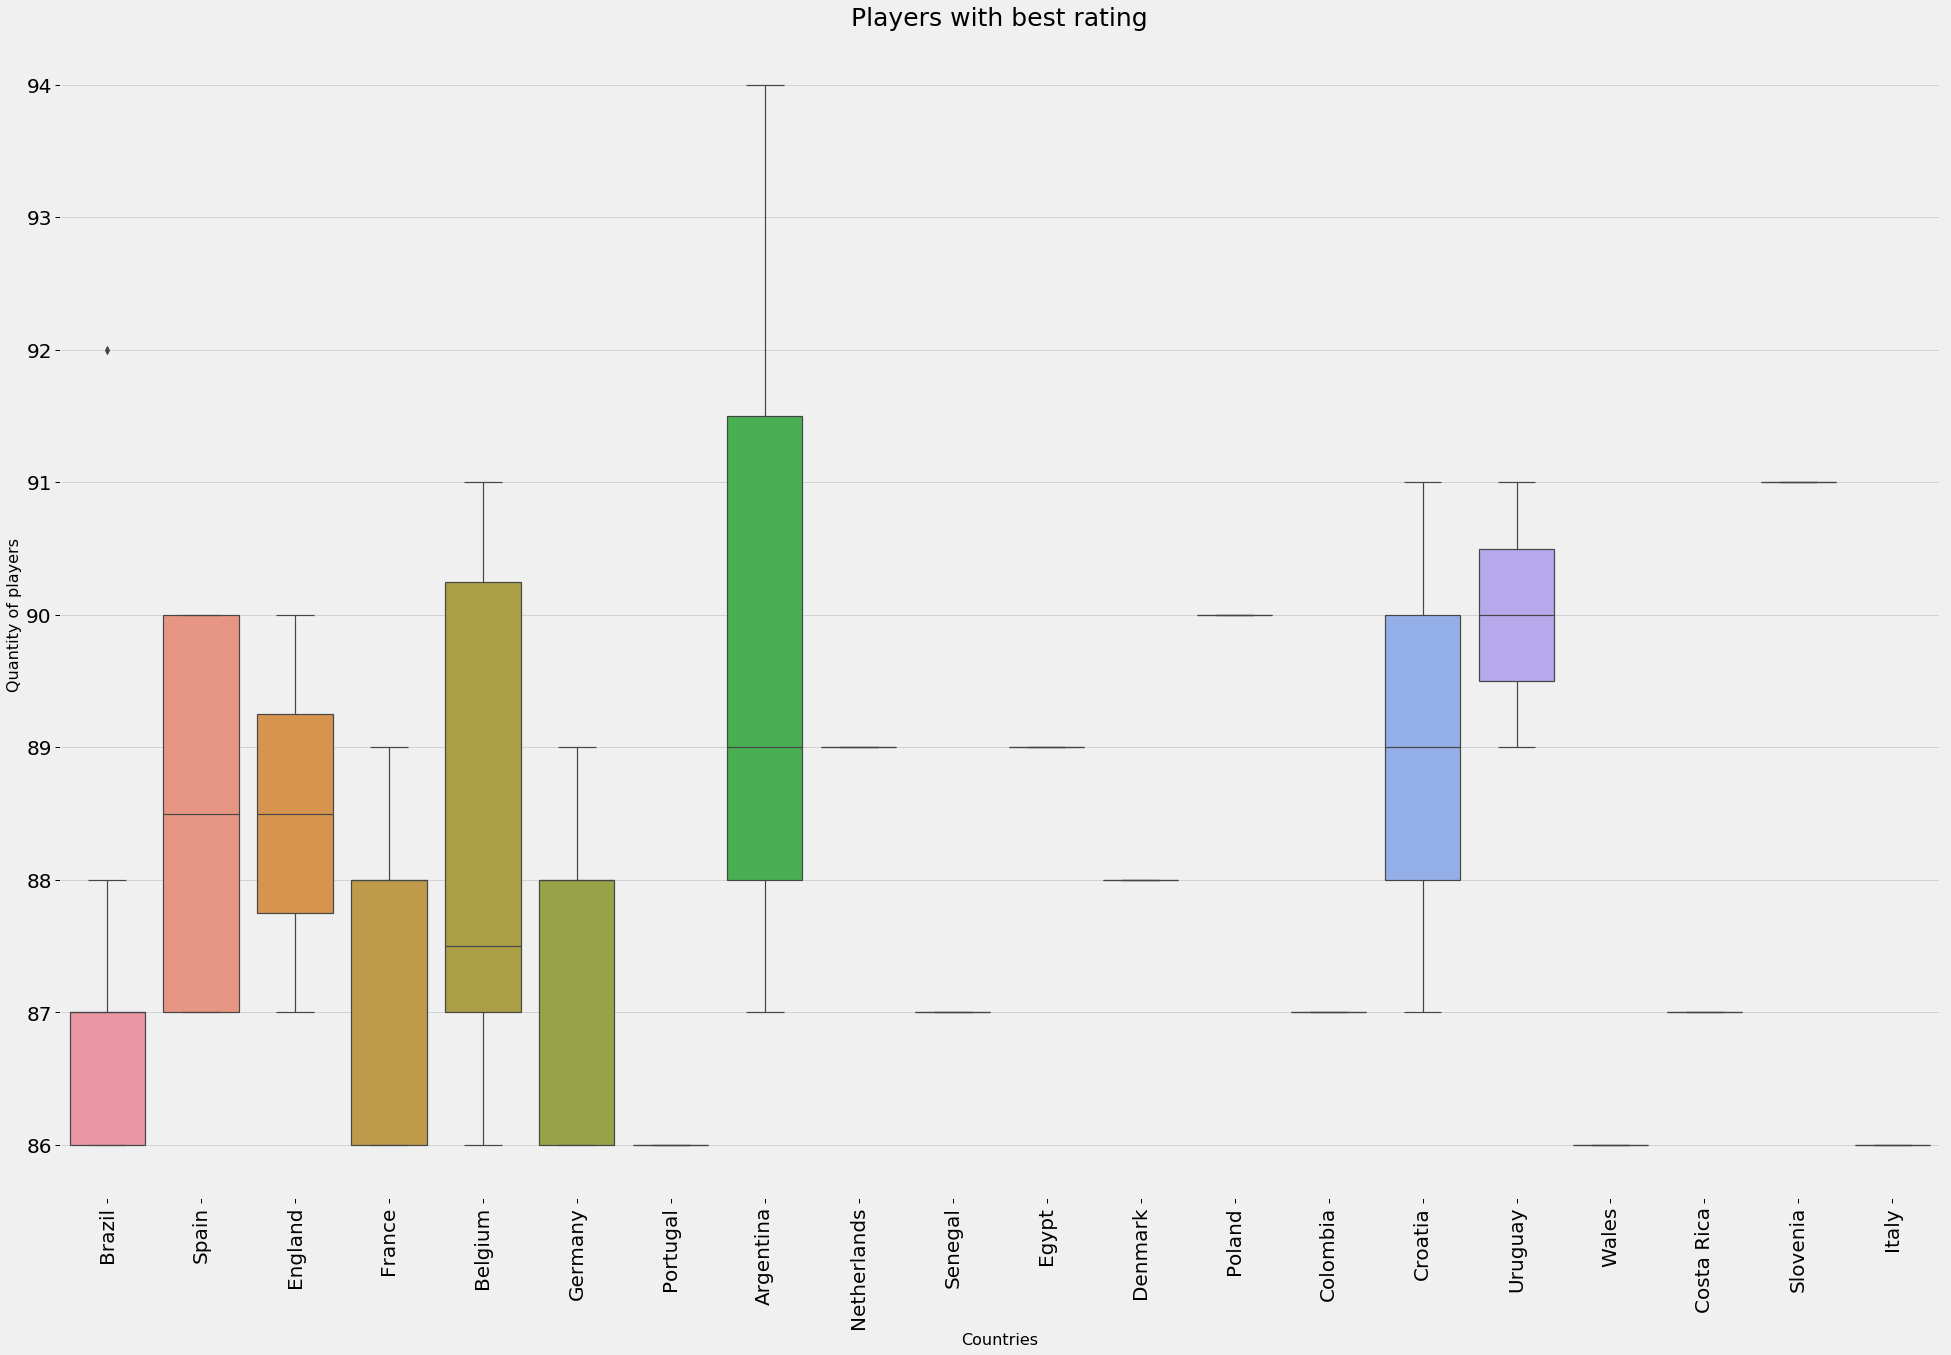

In [290]:
ax = sns.boxplot(x="birth_country", y="rating", data=dataset[dataset.rating>85])
ax.set_xlabel(xlabel = 'Countries', fontsize = 16)
ax.set_ylabel(ylabel = 'Quantity of players', fontsize = 16)
ax.set_title(label = "Players with best rating", fontsize = 25)
plt.xticks(rotation=90,fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

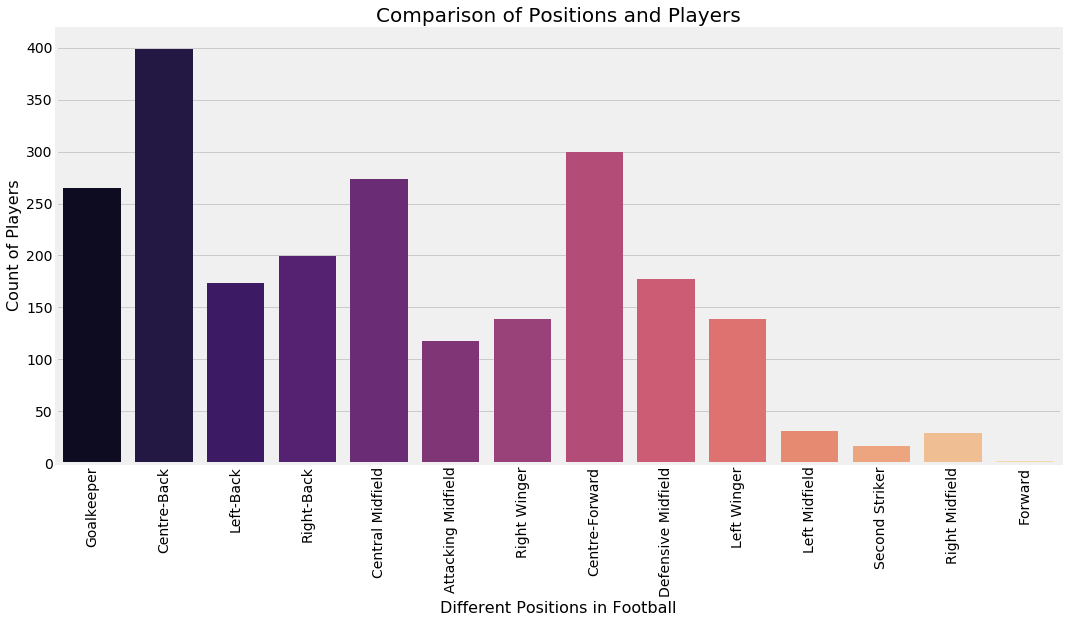

In [43]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')

ax = sns.countplot('position', data = dataset, palette = 'magma')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]), <a list of 9 Text yticklabel objects>)

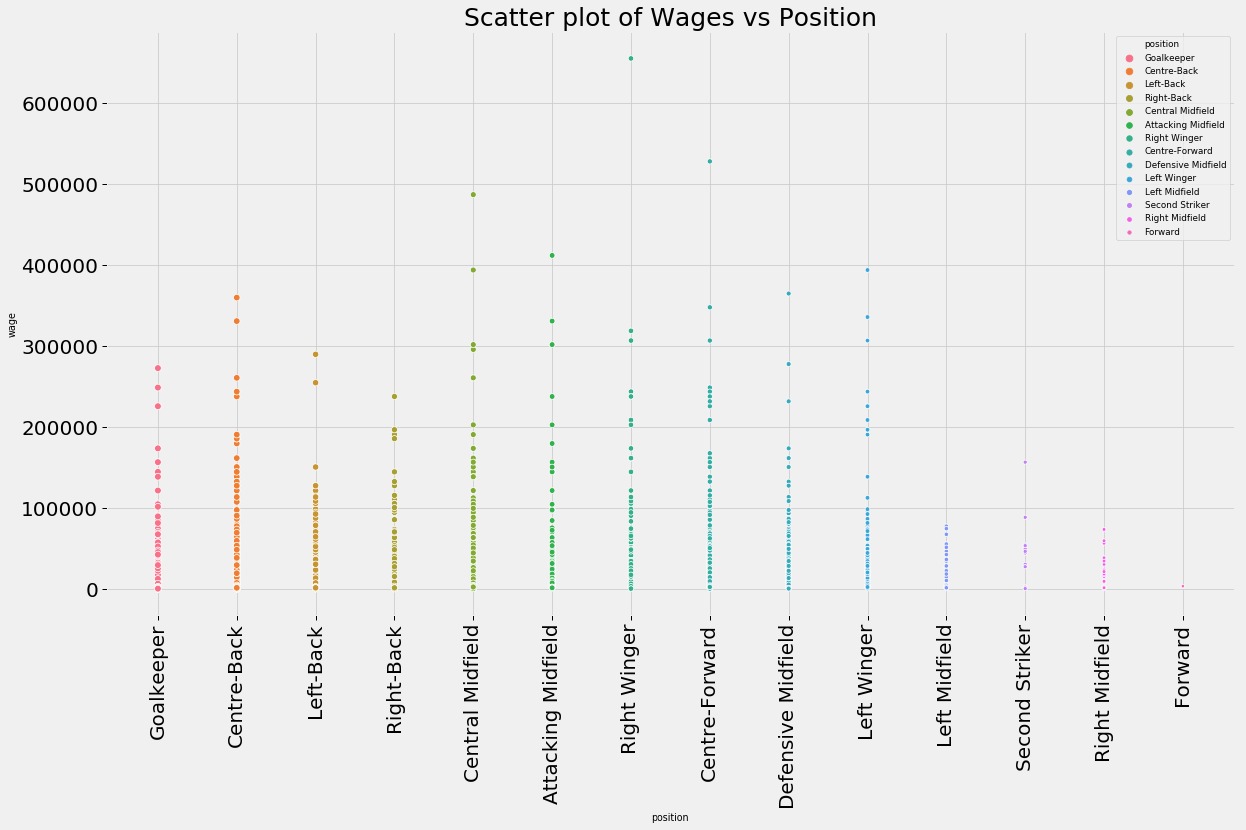

In [293]:
#plt.style.use('dark_background')
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x="position", y="wage", hue ="position", size= "position", data=dataset)
ax.set_title('Scatter plot of Wages vs Position', fontsize=25)
sns.set_context("paper", font_scale=1)
plt.xticks(rotation=90,fontsize = 20)
plt.yticks(fontsize = 20)

In [45]:
df_football['birth_country'].head()

0         Brazil
1         Kosovo
2        England
3         France
4    Netherlands
Name: birth_country, dtype: object

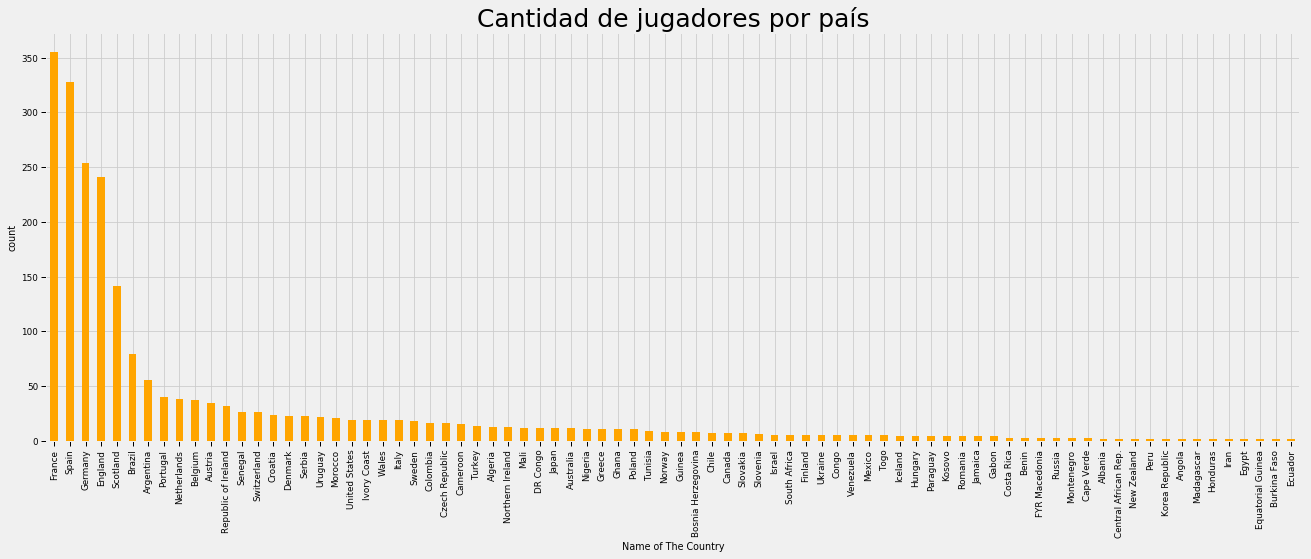

In [46]:
#plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')
df_football['birth_country'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Cantidad de jugadores por país', fontsize = 25)#, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

(array([ -5.00000000e+07,   0.00000000e+00,   5.00000000e+07,
          1.00000000e+08,   1.50000000e+08,   2.00000000e+08,
          2.50000000e+08]), <a list of 7 Text yticklabel objects>)

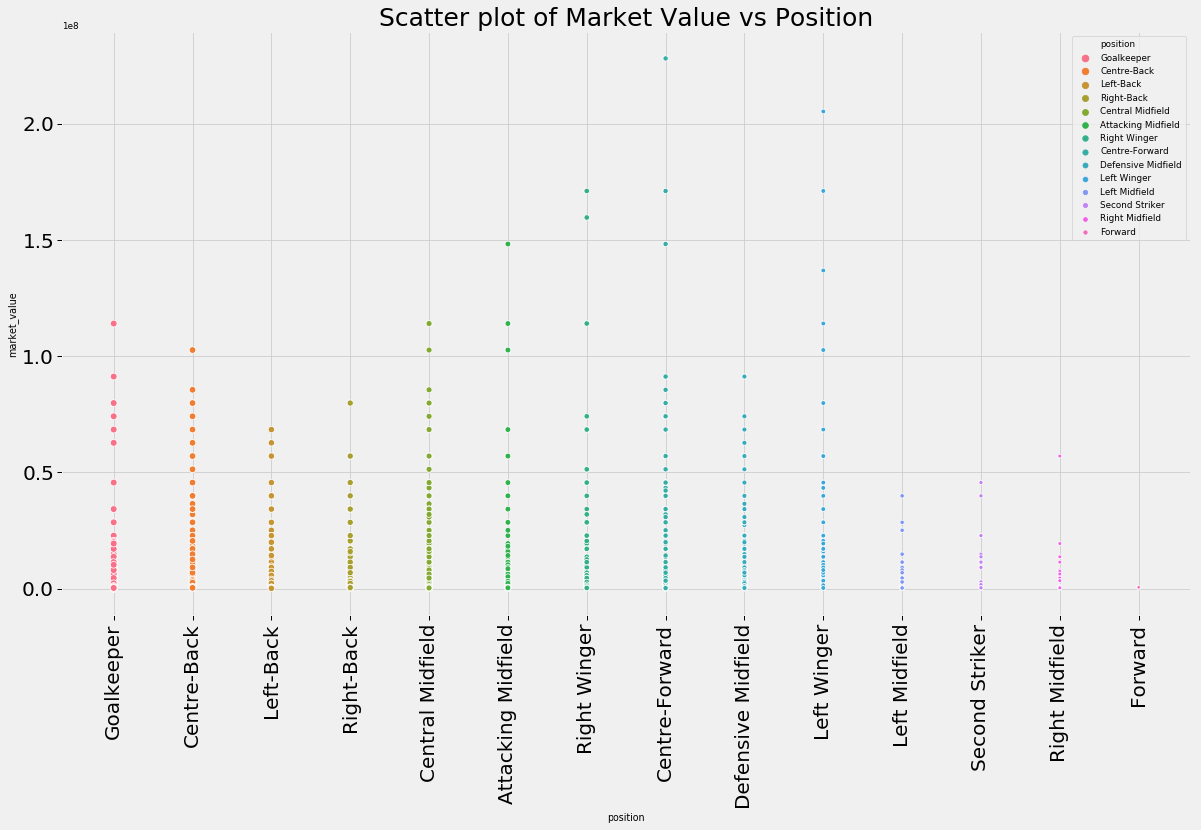

In [294]:
#plt.style.use('dark_background')
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x="position", y="market_value", hue ="position", size= "position", data=dataset)
ax.set_title('Scatter plot of Market Value vs Position', fontsize=25)
sns.set_context("paper", font_scale=1)
plt.xticks(rotation=90,fontsize = 20)
plt.yticks(fontsize = 20)
#miles de millones

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

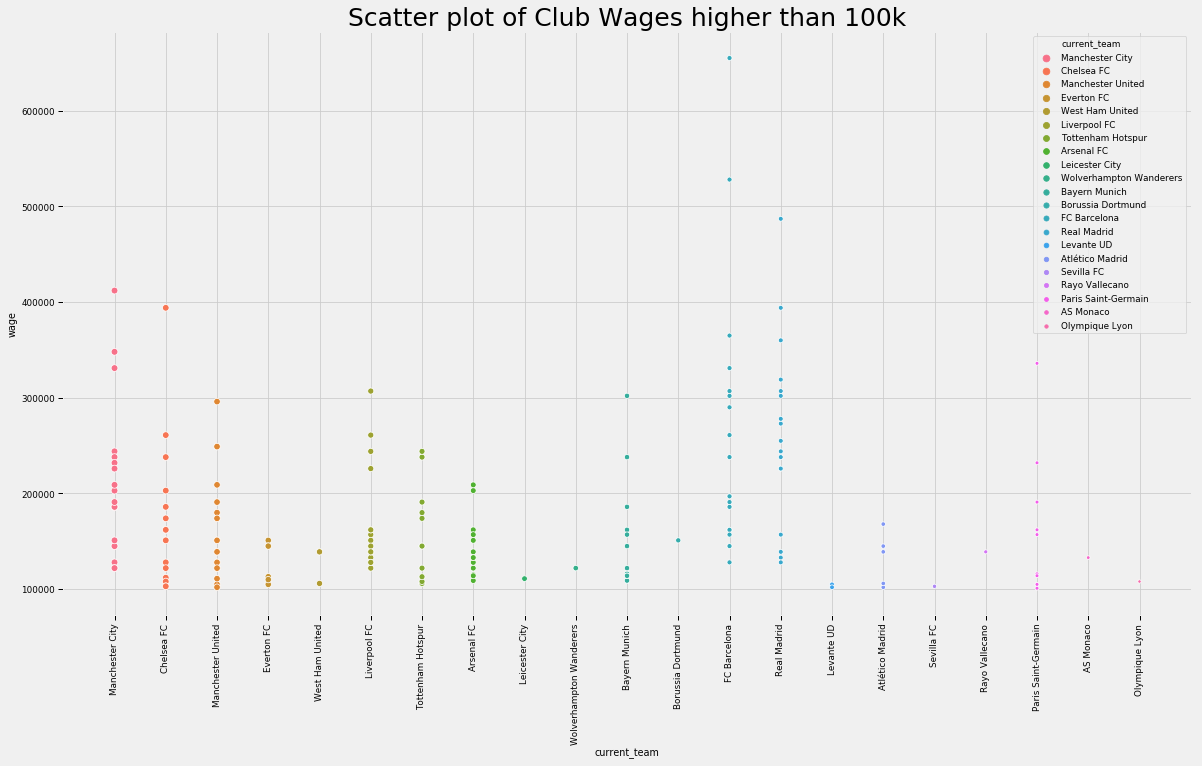

In [270]:
#plt.style.use('dark_background')
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x="current_team", y="wage", hue ="current_team", size= "current_team", data=dataset[dataset['wage']>100000])
ax.set_title('Scatter plot of Club Wages higher than 100k', fontsize=25)
sns.set_context("paper", font_scale=1)
plt.xticks(rotation=90)

In [47]:
dataset.columns

Index(['ID', 'name', 'player_image', 'birth_country', 'altura', 'peso',
       'rating', 'potential', 'wage', 'pref_foot', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'current_team',
       'jersey_num', 'position', 'age', 'joined', 'signed_from',
       'contract_until', 'market_value', 'Defending', 'General', 'Mental',
       'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')

### Copiar dataset para iniciar tratamiento

In [64]:
#Primero sacar la copia del dataframe
df_footballv2=dataset
df_footballv2.head(5)

,ID,name,player_image,birth_country,altura,peso,rating,potential,wage,pref_foot,...,contract_until,market_value,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,1,Ederson,https://cdn.sofifa.org/players/10/19/210257.png,Brazil,188,86,86,90,145000,left,...,30.06.2025,79800000.0,17,23,57,45,68,56,88,22
1,2,Arijanet Murić,https://cdn.sofifa.org/players/10/19/233164.png,Kosovo,197,81,64,81,5000,right,...,30.06.2021,2280000.0,12,18,39,29,45,50,72,16
2,3,John Stones,https://cdn.sofifa.org/players/10/19/203574.png,England,188,70,83,87,145000,right,...,30.06.2022,68400000.0,84,70,64,72,70,72,85,37
3,4,Eliaquim Mangala,https://cdn.sofifa.org/players/10/19/190531.png,France,187,84,76,78,97000,left,...,30.06.2020,11400000.0,77,55,55,56,62,74,77,47
4,5,Philippe Sandler,https://cdn.sofifa.org/players/10/19/234679.png,Netherlands,190,82,70,83,38000,right,...,30.06.2022,2850000.0,70,68,55,58,64,66,76,42


In [49]:
df_footballv2.columns

Index(['ID', 'name', 'player_image', 'birth_country', 'altura', 'peso',
       'rating', 'potential', 'wage', 'pref_foot', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'current_team',
       'jersey_num', 'position', 'age', 'joined', 'signed_from',
       'contract_until', 'market_value', 'Defending', 'General', 'Mental',
       'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')

In [50]:
#df_footballv2.joined

###  Eliminación de Variables por criterio y removiendo variables string
    
- Se eliminaron las columnas del tipo string que no son relevantes según criterio propio.
    - ID
    - player_image
    - Altura
    - Peso
    - joined
    - contract_until
    - 'Defending', 'General', 'Mental',
       'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'

In [65]:
df_footballv2= df_footballv2.drop(['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Rating', 'Shooting',
                                  'ID','player_image','joined','contract_until','current_team','signed_from'],axis=1)

In [70]:
df_footballv2.head()

,name,birth_country,altura,peso,rating,potential,wage,pref_foot,aggression,interceptions,...,balance,shot_power,jumping,stamina,strength,long_shots,jersey_num,position,age,market_value
0,Ederson,Brazil,188,86,86,90,145000,left,38,27,...,48,42,66,41,68,18,31,Goalkeeper,25,79800000.0
1,Arijanet Murić,Kosovo,197,81,64,81,5000,right,24,18,...,40,21,62,29,68,14,49,Goalkeeper,20,2280000.0
2,John Stones,England,188,70,83,87,145000,right,79,81,...,59,46,75,79,77,38,5,Centre-Back,25,68400000.0
3,Eliaquim Mangala,France,187,84,76,78,97000,left,89,71,...,60,67,86,64,87,48,15,Centre-Back,28,11400000.0
4,Philippe Sandler,Netherlands,190,82,70,83,38000,right,65,65,...,55,63,69,65,75,52,34,Centre-Back,22,2850000.0


In [ ]:
for x in dataset['jersey_num']:
    try:
        int(x)
    except:
        print (x)

In [67]:
df_footballv2.shape

(2261, 45)

### Diagrama de correlacion

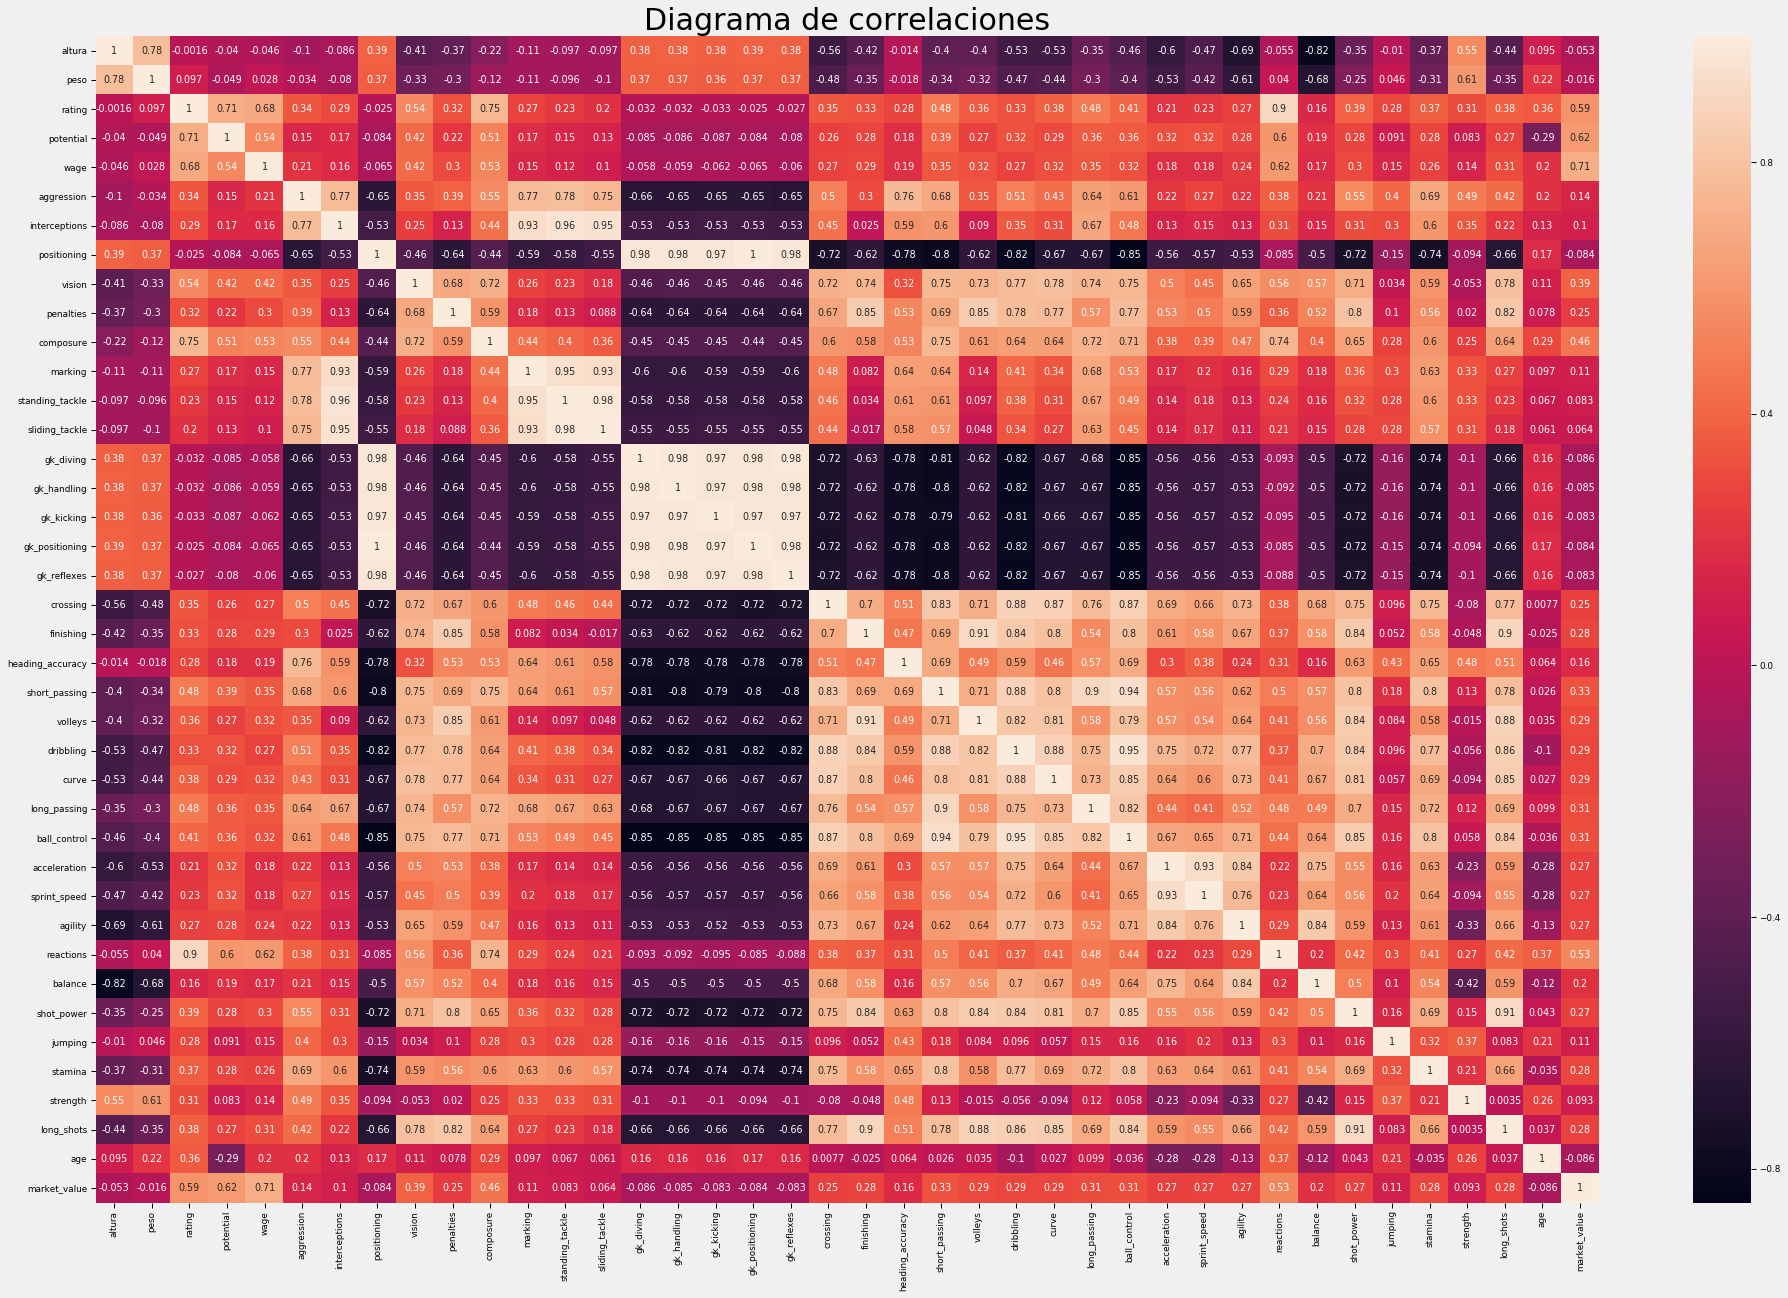

In [68]:
#list(df_footballFinal)
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df_footballv2.corr(), annot = True)
plt.title('Diagrama de correlaciones', fontsize = 30)
plt.show()

## Estandarizacion

In [73]:
df_footballv2.columns

Index(['name', 'birth_country', 'altura', 'peso', 'rating', 'potential',
       'wage', 'pref_foot', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'jersey_num', 'position', 'age',
       'market_value'],
      dtype='object')

In [86]:
cat_features=['position','pref_foot'] #'birth_country','jersey_num','name'
num_features=['altura', 'peso', 'rating', 'potential',
       'wage','aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots','age','market_value']

In [72]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

<center>  <img src="https://arshpreetsingh.files.wordpress.com/2017/03/normal.png" width="300"> <center>  
<i>"Formula de estandarización"

In [87]:
scaler = MinMaxScaler()
Standarized_data=scaler.fit_transform(df_footballv2[num_features])
Standarized_data=pd.DataFrame(Standarized_data,columns=num_features)
Standarized_data.head()

,altura,peso,rating,potential,wage,aggression,interceptions,positioning,vision,penalties,...,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,age,market_value
0,0.666667,0.673913,0.826087,0.878049,0.220183,0.320988,0.269663,0.900000,0.710843,0.096386,...,0.520000,0.870968,0.360000,0.382716,0.562500,0.325301,0.617647,0.146067,0.333333,0.3500
1,0.897436,0.565217,0.347826,0.658537,0.006116,0.148148,0.168539,0.700000,0.349398,0.108434,...,0.226667,0.290323,0.253333,0.123457,0.500000,0.180723,0.617647,0.101124,0.125000,0.0100
2,0.666667,0.326087,0.760870,0.804878,0.220183,0.827160,0.876404,0.100000,0.674699,0.421687,...,0.533333,0.790323,0.506667,0.432099,0.703125,0.783133,0.750000,0.370787,0.333333,0.3000
3,0.641026,0.630435,0.608696,0.585366,0.146789,0.950617,0.764045,0.100000,0.433735,0.469880,...,0.546667,0.467742,0.520000,0.691358,0.875000,0.602410,0.897059,0.483146,0.458333,0.0500
4,0.717949,0.586957,0.478261,0.707317,0.056575,0.654321,0.696629,0.133333,0.674699,0.445783,...,0.560000,0.467742,0.453333,0.641975,0.609375,0.614458,0.720588,0.528090,0.208333,0.0125


In [88]:
#colocar variables estandarizadas en data
df_footballv2 = df_footballv2.drop(columns = num_features,axis = 1)
df_footballv2= df_footballv2.merge(Standarized_data,left_index=True,right_index=True,how = "left")
df_footballv2.head()

,name,birth_country,pref_foot,jersey_num,position,altura,peso,rating,potential,wage,...,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,age,market_value
0,Ederson,Brazil,left,31,Goalkeeper,0.666667,0.673913,0.826087,0.878049,0.220183,...,0.520000,0.870968,0.360000,0.382716,0.562500,0.325301,0.617647,0.146067,0.333333,0.3500
1,Arijanet Murić,Kosovo,right,49,Goalkeeper,0.897436,0.565217,0.347826,0.658537,0.006116,...,0.226667,0.290323,0.253333,0.123457,0.500000,0.180723,0.617647,0.101124,0.125000,0.0100
2,John Stones,England,right,5,Centre-Back,0.666667,0.326087,0.760870,0.804878,0.220183,...,0.533333,0.790323,0.506667,0.432099,0.703125,0.783133,0.750000,0.370787,0.333333,0.3000
3,Eliaquim Mangala,France,left,15,Centre-Back,0.641026,0.630435,0.608696,0.585366,0.146789,...,0.546667,0.467742,0.520000,0.691358,0.875000,0.602410,0.897059,0.483146,0.458333,0.0500
4,Philippe Sandler,Netherlands,right,34,Centre-Back,0.717949,0.586957,0.478261,0.707317,0.056575,...,0.560000,0.467742,0.453333,0.641975,0.609375,0.614458,0.720588,0.528090,0.208333,0.0125


## **Convert to Dummies (categoricas)**

In [90]:
# Convertir variables categoricas  a dummies
fb_with_dummies = pd.get_dummies(data=df_footballv2, columns = cat_features, \
                                   prefix = cat_features)
fb_with_dummies.head()

,name,birth_country,jersey_num,altura,peso,rating,potential,wage,aggression,interceptions,...,position_Left Midfield,position_Left Winger,position_Left-Back,position_Right Midfield,position_Right Winger,position_Right-Back,position_Second Striker,pref_foot_both,pref_foot_left,pref_foot_right
0,Ederson,Brazil,31,0.666667,0.673913,0.826087,0.878049,0.220183,0.320988,0.269663,...,0,0,0,0,0,0,0,0,1,0
1,Arijanet Murić,Kosovo,49,0.897436,0.565217,0.347826,0.658537,0.006116,0.148148,0.168539,...,0,0,0,0,0,0,0,0,0,1
2,John Stones,England,5,0.666667,0.326087,0.760870,0.804878,0.220183,0.827160,0.876404,...,0,0,0,0,0,0,0,0,0,1
3,Eliaquim Mangala,France,15,0.641026,0.630435,0.608696,0.585366,0.146789,0.950617,0.764045,...,0,0,0,0,0,0,0,0,1,0
4,Philippe Sandler,Netherlands,34,0.717949,0.586957,0.478261,0.707317,0.056575,0.654321,0.696629,...,0,0,0,0,0,0,0,0,0,1


In [237]:
fb_with_dummies.columns

Index(['name', 'birth_country', 'jersey_num', 'altura', 'peso', 'rating',
       'potential', 'wage', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'age', 'market_value',
       'position_Attacking Midfield', 'position_Central Midfield',
       'position_Centre-Back', 'position_Centre-Forward',
       'position_Defensive Midfield', 'position_Forward',
       'position_Goalkeeper', 'position_Left Midfield', 'position_Left Winger',
       'position_Left-Back', 'position_Right Midfield',
       'position_Right Winger', 'position_Righ

## Aplicación del modelo

In [111]:
from sklearn.neighbors import NearestNeighbors

In [110]:
#fb_with_dummies.iloc[:,3:]

In [112]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(fb_with_dummies.iloc[:,3:]) 


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [120]:
fb_with_dummies.iloc[0:1,3:]

,altura,peso,rating,potential,wage,aggression,interceptions,positioning,vision,penalties,...,position_Left Midfield,position_Left Winger,position_Left-Back,position_Right Midfield,position_Right Winger,position_Right-Back,position_Second Striker,pref_foot_both,pref_foot_left,pref_foot_right
0,0.666667,0.673913,0.826087,0.878049,0.220183,0.320988,0.269663,0.9,0.710843,0.096386,...,0,0,0,0,0,0,0,0,1,0


In [149]:
neigh.kneighbors(fb_with_dummies.iloc[0:1,3:], return_distance=True)

(array([[ 0.        ,  0.5948458 ,  0.80846284,  0.83753275,  0.85401694]]),
 array([[   0,   86,  378, 1746, 1045]], dtype=int64))

In [235]:
def get_index(x,data):
    return data[data['name']==x].index.tolist()[0]

def player_recommend(name):
    #Obtener index en matriz final
    prin=get_index(name,fb_with_dummies)
    #Obtener vector con datos característicos y distancias
    D=neigh.kneighbors(fb_with_dummies.iloc[prin:(prin+1),3:], return_distance=True)

    Dis=D[0].tolist()[0]#vector de distancia
    Ind=D[1].tolist()[0]#vector de index jugador
    
    
    for x,i in enumerate(Ind):
        dex=get_index(fb_with_dummies.at[int(i),'name'],players)
        if x==0:
            print("Player info: \n")
        elif x==1:
            print("These are 4 players similar to {} : ".format(name))
            print("-------------------------------------------------------------------------------\n")
            
        print("Name: {0}\nDistance: {1}\nPosition: {2}\nMarket value: {3}\n".format(
            fb_with_dummies.at[int(i),'name'],
            Dis[x],
            players.iloc[dex]['position'],
            players.iloc[dex]['market_value']))

In [299]:
player_recommend('Sergio Agüero')

Player info: 

Name: Sergio Agüero
Distance: 0.0
Position: Centre-Forward
Market value: $74.10m

These are 4 players similar to Sergio Agüero : 
-------------------------------------------------------------------------------

Name: Alexandre Lacazette
Distance: 0.6011310728930966
Position: Centre-Forward
Market value: $79.80m

Name: Robert Lewandowski
Distance: 0.6596546463245253
Position: Centre-Forward
Market value: $74.10m

Name: Andrej Kramaric
Distance: 0.6976498363160585
Position: Centre-Forward
Market value: $43.32m

Name: Gabriel Jesus
Distance: 0.7076099853870965
Position: Centre-Forward
Market value: $79.80m



In [204]:
fb_with_dummies['name'].tolist()

['Ederson',
 'Arijanet Murić',
 'John Stones',
 'Eliaquim Mangala',
 'Philippe Sandler',
 'Oleksandr Zinchenko',
 'Danilo',
 'Ilkay Gündogan',
 'Fabian Delph',
 'David Silva',
 'Raheem Sterling',
 'Riyad Mahrez',
 'Gabriel Jesus',
 'Claudio Bravo',
 'Aymeric Laporte',
 'Nicolás Otamendi',
 'Vincent Kompany',
 'Benjamin Mendy',
 'Kyle Walker',
 'Fernandinho',
 'Phil Foden',
 'Kevin De Bruyne',
 'Leroy Sané',
 'Bernardo Silva',
 'Jack Harrison',
 'Sergio Agüero',
 'Kepa',
 'Jamal Blackman',
 'Antonio Rüdiger',
 'Kurt Zouma',
 'Ethan Ampadu',
 'Tomas Kalas',
 'Matt Miazga',
 'Emerson',
 'Davide Zappacosta',
 'Jorginho',
 'Mateo Kovacic',
 'Danny Drinkwater',
 'Kenedy',
 'Pedro',
 'Michy Batshuayi',
 'Olivier Giroud',
 'Willy Caballero',
 'Rob Green',
 'Andreas Christensen',
 'David Luiz',
 'Gary Cahill',
 'Michael Hector',
 'Marcos Alonso',
 'César Azpilicueta',
 'Todd Kane',
 "N'Golo Kanté",
 'Ross Barkley',
 'Marco van Ginkel',
 'Lewis Baker',
 'Eden Hazard',
 'Willian',
 'Gonzalo Higua

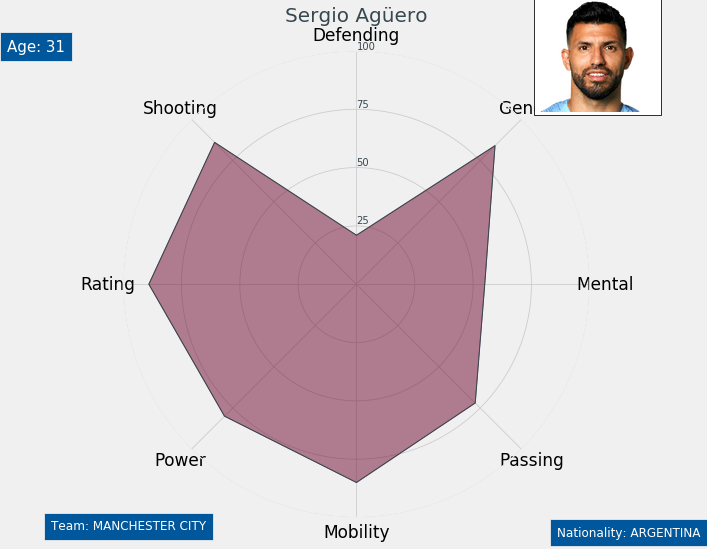

In [264]:
graphPolar(get_index('Sergio Agüero',players))

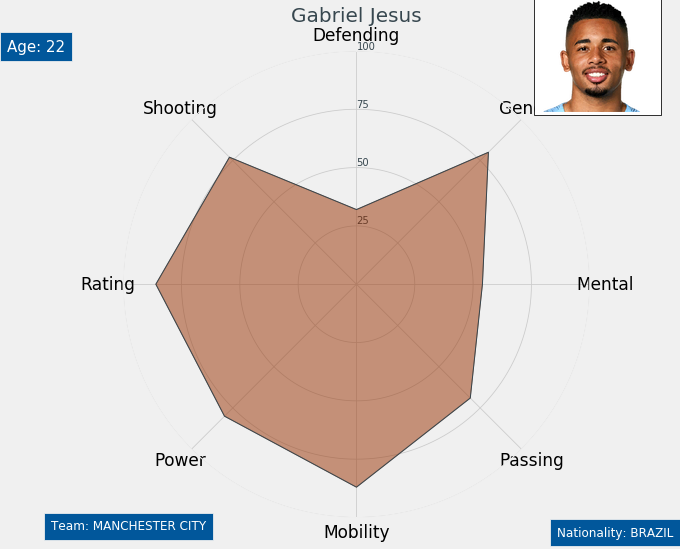

In [262]:
graphPolar(get_index('Gabriel Jesus',players))

In [252]:
players.iloc[55]

name                                                 Eden Hazard
Defending                                                     28
General                                                       83
Mental                                                        57
Passing                                                       84
Mobility                                                      92
Power                                                         75
Rating                                                        91
Shooting                                                      82
position                                             Left Winger
age                                                           28
birth_country                                            Belgium
player_image     https://cdn.sofifa.org/players/10/19/183277.png
market_value                                            $171.00m
current_team                                          Chelsea FC
Name: 55, dtype: object